In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
data1 = np.loadtxt('1.txt')
data3 = np.loadtxt('3.txt')
data4 = np.loadtxt('4.txt')
data6 = np.loadtxt('6.txt')

# 1. Предобработка данных

## 1.1 Файл 1, Нормальное распределение
### Расчет кол-ва интервалов по формуле Стерджесса

In [58]:
df1 = pd.DataFrame(data1)
print(df1[0], '\n')
m = np.round(1 + np.log2(len(df1)))

x_min = df1[0].min()
x_max = df1[0].max()
print("Мин. элемент: ", x_min)
print("Макс. элемент: ", x_max)

print("Кол-во интервалов: ", m)
h = (x_max - x_min) / m
print("Длина интервала: ", h)

0     25.851021
1      6.215734
2      6.748156
3     11.657533
4      4.994553
5     -3.992149
6     -8.000623
7      0.700447
8     13.552194
9     -0.262531
10    23.326416
11     7.257133
12     3.003417
13     3.234019
14     6.561683
15    15.577409
16    13.339141
17    10.307096
18     9.035763
19    -0.955054
20    12.442391
21    16.606171
22     7.302802
23    20.615779
24    22.693342
25     4.701888
26     4.517863
27     7.012669
28     2.689395
29     7.163878
30     8.136097
31    15.405849
Name: 0, dtype: float64 

Мин. элемент:  -8.0006234602222
Макс. элемент:  25.85102134403422
Кол-во интервалов:  6.0
Длина интервала:  5.641940800709404


### Расчет границ интервалов

In [59]:
x_start = x_min - 0.01
intervals = [np.round(x_start, decimals=1)]

for i in range(int(m) + 1):
    intervals.append(np.round(intervals[len(intervals) - 1] + h, decimals=1))

print("Границы интервалов: ", intervals)

Границы интервалов:  [-8.0, -2.4, 3.2, 8.8, 14.4, 20.0, 25.6, 31.2]


### Разбивка выборки по интервалам

In [60]:
# Абсолютные частоты
counts = pd.cut(df1[0], bins=intervals, right=False).value_counts()

# Относительные частоты
weights = counts / len(df1)

interval_starts = [interval.left for interval in counts.index]
interval_ends = [interval.right for interval in counts.index]

int_data1 = pd.DataFrame({
    'Start': interval_starts,
    'End': interval_ends,
    'Abs_Freq': counts.values,
    'Relative_Freq': weights.values
})

int_data1 = int_data1.sort_values('Start').reset_index(drop=True)

int_data1

,Start,End,Abs_Freq,Relative_Freq
0,-8.0,-2.4,1,0.03125
1,-2.4,3.2,5,0.15625
2,3.2,8.8,12,0.37500
3,8.8,14.4,6,0.18750
4,14.4,20.0,3,0.09375
5,20.0,25.6,3,0.09375
6,25.6,31.2,1,0.03125


### Построение гистограммы абсолютных частот

Text(0.5, 1.0, 'Гистограмма частот по интервалам')

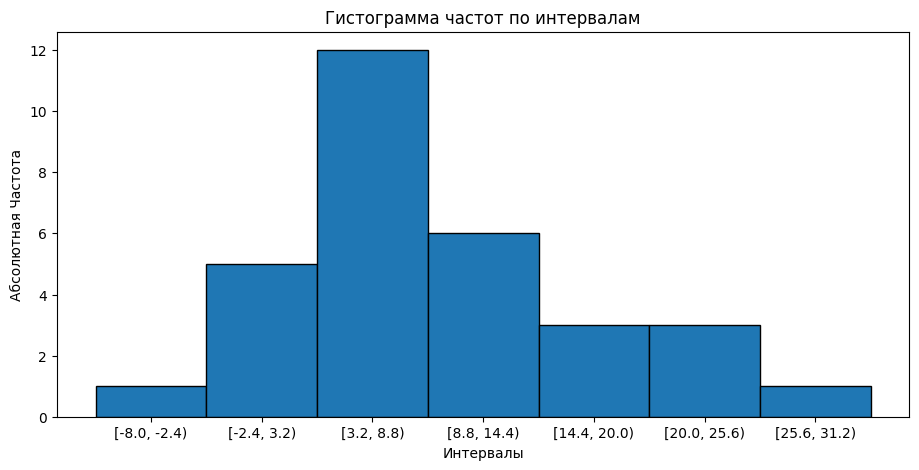

In [61]:
plt.figure(figsize=(11, 5))

interval_labels = [f'[{start}, {end})' for start, end in zip(int_data1['Start'], int_data1['End'])]

plt.bar(int_data1['Start'], int_data1['Abs_Freq'], width=int_data1['End'] - int_data1['Start'], edgecolor='black')

plt.xticks(ticks=int_data1['Start'], labels=interval_labels)

plt.xlabel('Интервалы')
plt.ylabel('Абсолютная Частота')
plt.title('Гистограмма частот по интервалам')

## 1.2 Файл 3, Показательное распределение
### Расчет кол-ва интервалов по формуле Стерджесса

In [53]:
df3 = pd.DataFrame(data3)
print(df3[0], '\n')
m = np.round(1 + np.log2(len(df3)))

x_min = df3[0].min()
x_max = df3[0].max()
print("Мин. элемент: ", x_min)
print("Макс. элемент: ", x_max)

print("Кол-во интервалов: ", m)
h = (x_max - x_min) / m
print("Длина интервала: ", h)

0     0.436545
1     1.093156
2     6.663138
3     0.595645
4     1.315263
5     4.407855
6     2.177293
7     0.781524
8     0.321020
9     1.307372
10    1.356600
11    1.357351
12    1.153872
13    0.509638
14    0.615422
15    3.616259
16    1.139076
17    0.030235
18    6.525480
19    0.414763
20    1.426483
21    0.238055
22    1.306088
23    0.388352
24    0.086548
25    0.775001
26    1.209405
27    5.685765
28    0.583870
29    0.363960
30    2.407929
31    1.144670
Name: 0, dtype: float64 

Мин. элемент:  0.030234894482792443
Макс. элемент:  6.663138386227194
Кол-во интервалов:  6.0
Длина интервала:  1.1054839152907336


### Расчет границ интервалов

In [54]:
x_start = x_min - 0.01
intervals = [np.round(x_start, decimals=1)]

for i in range(int(m) + 1):
    intervals.append(np.round(intervals[len(intervals) - 1] + h, decimals=1))

print("Границы интервалов: ", intervals)

Границы интервалов:  [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7]


### Разбивка выборки по интервалам

In [55]:
# Абсолютные частоты
counts = pd.cut(df3[0], bins=intervals, right=False).value_counts()

# Относительные частоты
weights = counts / len(df3)

interval_starts = [interval.left for interval in counts.index]
interval_ends = [interval.right for interval in counts.index]

int_data3 = pd.DataFrame({
    'Start': interval_starts,
    'End': interval_ends,
    'Abs_Freq': counts.values,
    'Relative_Freq': weights.values
})

int_data3 = int_data3.sort_values('Start').reset_index(drop=True)

int_data3

,Start,End,Abs_Freq,Relative_Freq
0,0.0,1.1,15,0.46875
1,1.1,2.2,11,0.34375
2,2.2,3.3,1,0.03125
3,3.3,4.4,1,0.03125
4,4.4,5.5,1,0.03125
5,5.5,6.6,2,0.06250
6,6.6,7.7,1,0.03125


### Построение гистограммы абсолютных частот

Text(0.5, 1.0, 'Гистограмма частот по интервалам')

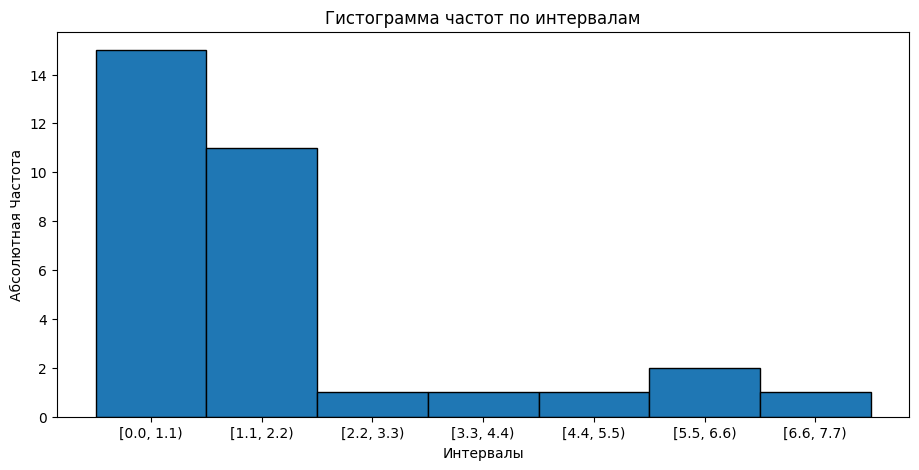

In [56]:
plt.figure(figsize=(11, 5))

interval_labels = [f'[{start}, {end})' for start, end in zip(int_data3['Start'], int_data3['End'])]

plt.bar(int_data3['Start'], int_data3['Abs_Freq'], width=int_data3['End'] - int_data3['Start'], edgecolor='black')

plt.xticks(ticks=int_data3['Start'], labels=interval_labels)

plt.xlabel('Интервалы')
plt.ylabel('Абсолютная Частота')
plt.title('Гистограмма частот по интервалам')

## 1.3 Файл 4, Нормальное распределение
### Расчет кол-ва интервалов по формуле Стерджесса

In [75]:
df4 = pd.DataFrame(data4)
print(df4[0], '\n')
m = np.round(1 + np.log2(len(df4)))

x_min = df4[0].min()
x_max = df4[0].max()
print("Мин. элемент: ", x_min)
print("Макс. элемент: ", x_max)

print("Кол-во интервалов: ", m)
h = (x_max - x_min) / m
print("Длина интервала: ", h)

0     -10.083557
1       0.866771
2      -2.187311
3      -3.833332
4      -5.056067
         ...    
123    -7.720368
124     1.929173
125    -6.732343
126    -0.952339
127    -1.306613
Name: 0, Length: 128, dtype: float64 

Мин. элемент:  -10.20216259032777
Макс. элемент:  14.94922777284164
Кол-во интервалов:  8.0
Длина интервала:  3.1439237953961765


### Расчет границ интервалов

In [76]:
x_start = x_min - 0.01
intervals = [np.round(x_start, decimals=1)]

for i in range(int(m) + 1):
    intervals.append(np.round(intervals[len(intervals) - 1] + h, decimals=1))

print("Границы интервалов: ", intervals)

Границы интервалов:  [-10.2, -7.1, -4.0, -0.9, 2.2, 5.3, 8.4, 11.5, 14.6, 17.7]


### Разбивка выборки по интервалам

In [77]:
# Абсолютные частоты
counts = pd.cut(df4[0], bins=intervals, right=False).value_counts()

# Относительные частоты
weights = counts / len(df4)

interval_starts = [interval.left for interval in counts.index]
interval_ends = [interval.right for interval in counts.index]

int_data4 = pd.DataFrame({
    'Start': interval_starts,
    'End': interval_ends,
    'Abs_Freq': counts.values,
    'Relative_Freq': weights.values
})

int_data4 = int_data4.sort_values('Start').reset_index(drop=True)

int_data4

,Start,End,Abs_Freq,Relative_Freq
0,-10.2,-7.1,13,0.101562
1,-7.1,-4.0,38,0.296875
2,-4.0,-0.9,35,0.273438
3,-0.9,2.2,34,0.265625
4,2.2,5.3,4,0.031250
5,5.3,8.4,2,0.015625
6,8.4,11.5,0,0.000000
7,11.5,14.6,0,0.000000
8,14.6,17.7,1,0.007812


### Построение гистограммы абсолютных частот

Text(0.5, 1.0, 'Гистограмма частот по интервалам')

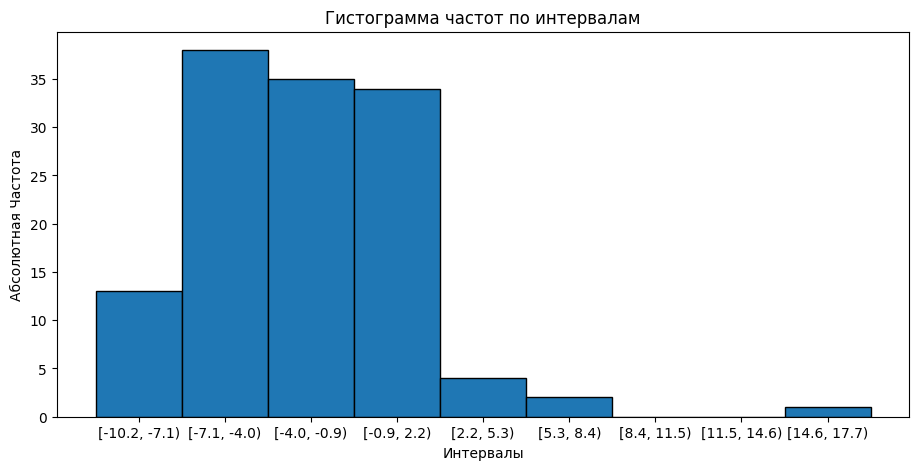

In [78]:
plt.figure(figsize=(11, 5))

interval_labels = [f'[{start}, {end})' for start, end in zip(int_data4['Start'], int_data4['End'])]

plt.bar(int_data4['Start'], int_data4['Abs_Freq'], width=int_data4['End'] - int_data4['Start'], edgecolor='black')

plt.xticks(ticks=int_data4['Start'], labels=interval_labels)

plt.xlabel('Интервалы')
plt.ylabel('Абсолютная Частота')
plt.title('Гистограмма частот по интервалам')

## 1.4 Файл 6, Показательное распределение
### Расчет кол-ва интервалов по формуле Стерджесса

In [71]:
df6 = pd.DataFrame(data6)
print(df6[0], '\n')
m = np.round(1 + np.log2(len(df6)))

x_min = df6[0].min()
x_max = df6[0].max()
print("Мин. элемент: ", x_min)
print("Макс. элемент: ", x_max)

print("Кол-во интервалов: ", m)
h = (x_max - x_min) / m
print("Длина интервала: ", h)

0      0.750455
1      1.453360
2      1.946754
3      1.309872
4      0.344315
         ...   
123    0.704171
124    1.758386
125    0.014330
126    1.943812
127    0.451599
Name: 0, Length: 128, dtype: float64 

Мин. элемент:  0.001657373872930414
Макс. элемент:  11.184406257356857
Кол-во интервалов:  8.0
Длина интервала:  1.3978436104354908


### Расчет границ интервалов

In [72]:
x_start = x_min - 0.01
intervals = [np.round(x_start, decimals=1)]

for i in range(int(m) + 1):
    intervals.append(np.round(intervals[len(intervals) - 1] + h, decimals=1))

print("Границы интервалов: ", intervals)

Границы интервалов:  [-0.0, 1.4, 2.8, 4.2, 5.6, 7.0, 8.4, 9.8, 11.2, 12.6]


### Разбивка выборки по интервалам

In [73]:
# Абсолютные частоты
counts = pd.cut(df6[0], bins=intervals, right=False).value_counts()

# Относительные частоты
weights = counts / len(df6)

interval_starts = [interval.left for interval in counts.index]
interval_ends = [interval.right for interval in counts.index]

int_data6 = pd.DataFrame({
    'Start': interval_starts,
    'End': interval_ends,
    'Abs_Freq': counts.values,
    'Relative_Freq': weights.values
})

int_data6 = int_data6.sort_values('Start').reset_index(drop=True)

int_data6

,Start,End,Abs_Freq,Relative_Freq
0,-0.0,1.4,52,0.406250
1,1.4,2.8,37,0.289062
2,2.8,4.2,18,0.140625
3,4.2,5.6,8,0.062500
4,5.6,7.0,4,0.031250
5,7.0,8.4,3,0.023438
6,8.4,9.8,5,0.039062
7,9.8,11.2,1,0.007812
8,11.2,12.6,0,0.000000


### Построение гистограммы абсолютных частот

Text(0.5, 1.0, 'Гистограмма частот по интервалам')

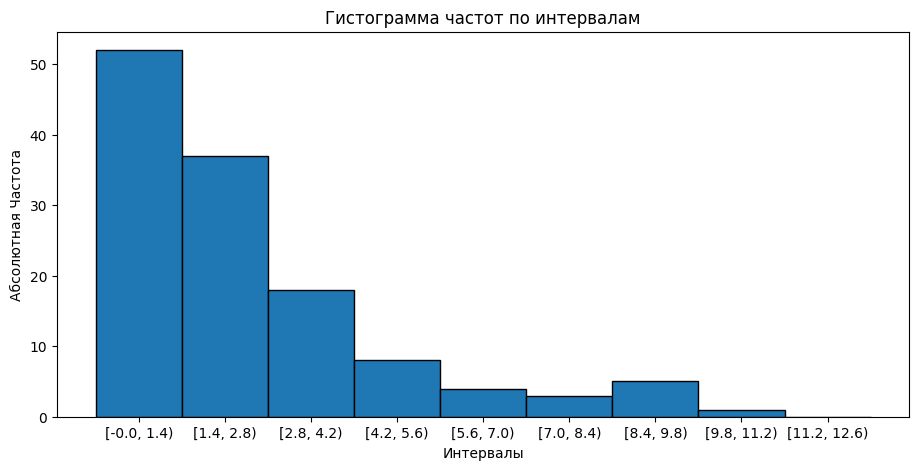

In [74]:
plt.figure(figsize=(11, 5))

interval_labels = [f'[{start}, {end})' for start, end in zip(int_data6['Start'], int_data6['End'])]

plt.bar(int_data6['Start'], int_data6['Abs_Freq'], width=int_data6['End'] - int_data6['Start'], edgecolor='black')

plt.xticks(ticks=int_data6['Start'], labels=interval_labels)

plt.xlabel('Интервалы')
plt.ylabel('Абсолютная Частота')
plt.title('Гистограмма частот по интервалам')

# 2. Критерий Пирсона

$\chi^2 = \sum_{i=1}^{m} \frac{(n_i - \hat{n}_i)^2}{\hat{n}_i}$

$\hat{n}_i = n \cdot P_i$

## 2.1 Проверка на нормальное распределение

$P_i = \Phi\left(\frac{x_{i+1} - \bar{x}_B}{S}\right) - \Phi\left(\frac{x_i - \bar{x}_B}{S}\right)$

In [79]:
def calculate_Pi_norm(start, end, mean, std):
    return stats.norm.cdf((end - mean) / std) - stats.norm.cdf((start - mean) / std)

### 2.1.1 Файл 1

In [81]:
int_data1['Pi'] = int_data1.apply(lambda row: calculate_Pi_norm(row['Start'], row['End'], df1[0].mean(), df1[0].std()), axis=1)
int_data1['nP'] = int_data1['Pi'] * len(df1)
int_data1['chi_square'] = ((int_data1['Abs_Freq'] - int_data1['nP']) ** 2) / int_data1['nP']
int_data1

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-8.0,-2.4,1,0.03125,0.062643,2.004569,0.503430
1,-2.4,3.2,5,0.15625,0.163738,5.239627,0.010959
2,3.2,8.8,12,0.37500,0.263168,8.421391,1.520704
3,8.8,14.4,6,0.18750,0.260217,8.326956,0.650265
4,14.4,20.0,3,0.09375,0.158290,5.065268,0.842075
5,20.0,25.6,3,0.09375,0.059205,1.894558,0.645007
6,25.6,31.2,1,0.03125,0.013603,0.435295,0.732589


In [82]:
#Критерий Пирсона
chi_square_statistic = int_data1['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data1) - 2 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является нормальным"
else:
    result = "Распределение нормальное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 4.905027090443468
Критическое значение: 9.487729036781154
Результат: Распределение нормальное


### 2.1.2 Файл 3

In [84]:
int_data3['Pi'] = int_data3.apply(lambda row: calculate_Pi_norm(row['Start'], row['End'], df3[0].mean(), df3[0].std()), axis=1)
int_data3['nP'] = int_data3['Pi'] * len(df3)
int_data3['chi_square'] = ((int_data3['Abs_Freq'] - int_data3['nP']) ** 2) / int_data3['nP']
int_data3

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,0.0,1.1,15,0.46875,0.203052,6.497650,11.125553
1,1.1,2.2,11,0.34375,0.239920,7.677425,1.437917
2,2.2,3.3,1,0.03125,0.197428,6.317689,4.475975
3,3.3,4.4,1,0.03125,0.113135,3.620329,1.896547
4,4.4,5.5,1,0.03125,0.045137,1.444390,0.136724
5,5.5,6.6,2,0.06250,0.012533,0.401058,6.374669
6,6.6,7.7,1,0.03125,0.002421,0.077466,10.986409


In [86]:
#Критерий Пирсона
chi_square_statistic = int_data3['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data3) - 2 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является нормальным"
else:
    result = "Распределение нормальное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 36.43379329089787
Критическое значение: 9.487729036781154
Результат: Распределение не является нормальным


### 2.1.3 Файл 4

In [87]:
int_data4['Pi'] = int_data4.apply(lambda row: calculate_Pi_norm(row['Start'], row['End'], df4[0].mean(), df4[0].std()), axis=1)
int_data4['nP'] = int_data4['Pi'] * len(df4)
int_data4['chi_square'] = ((int_data4['Abs_Freq'] - int_data4['nP']) ** 2) / int_data4['nP']
int_data4

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-10.2,-7.1,13,0.101562,0.104016,13.314084,0.007409
1,-7.1,-4.0,38,0.296875,0.244206,31.258343,1.454010
2,-4.0,-0.9,35,0.273438,0.310969,39.803979,0.579797
3,-0.9,2.2,34,0.265625,0.214887,27.505484,1.533466
4,2.2,5.3,4,0.031250,0.080518,10.306244,3.858701
5,5.3,8.4,2,0.015625,0.016327,2.089857,0.003864
6,8.4,11.5,0,0.000000,0.001787,0.228689,0.228689
7,11.5,14.6,0,0.000000,0.000105,0.013461,0.013461
8,14.6,17.7,1,0.007812,0.000003,0.000425,2352.394863


In [88]:
#Критерий Пирсона
chi_square_statistic = int_data4['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data4) - 2 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является нормальным"
else:
    result = "Распределение нормальное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 2360.074259172993
Критическое значение: 12.591587243743977
Результат: Распределение не является нормальным


### 2.1.4 Файл 6

In [89]:
int_data6['Pi'] = int_data6.apply(lambda row: calculate_Pi_norm(row['Start'], row['End'], df6[0].mean(), df6[0].std()), axis=1)
int_data6['nP'] = int_data6['Pi'] * len(df6)
int_data6['chi_square'] = ((int_data6['Abs_Freq'] - int_data6['nP']) ** 2) / int_data6['nP']
int_data6

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-0.0,1.4,52,0.406250,0.179743,23.007103,36.536024
1,1.4,2.8,37,0.289062,0.231146,29.586725,1.857477
2,2.8,4.2,18,0.140625,0.211141,27.026049,3.014483
3,4.2,5.6,8,0.062500,0.136992,17.534961,5.184813
4,5.6,7.0,4,0.031250,0.063123,8.079733,2.059997
5,7.0,8.4,3,0.023438,0.020651,2.643284,0.048139
6,8.4,9.8,5,0.039062,0.004795,0.613744,31.347339
7,9.8,11.2,1,0.007812,0.000790,0.101096,7.992666
8,11.2,12.6,0,0.000000,0.000092,0.011808,0.011808


In [90]:
#Критерий Пирсона
chi_square_statistic = int_data6['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data6) - 2 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является нормальным"
else:
    result = "Распределение нормальное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 88.0527446805703
Критическое значение: 12.591587243743977
Результат: Распределение не является нормальным


## 2.2 Проверка на показательное распределение

$P_i = e^{-\lambda x_i} - e^{-\lambda x_{i+1}}$

$\lambda = \frac{1}{\bar{x}_B}$

In [83]:
def calculate_Pi_exp(start, end, mean):
    start = max(start, 0)
    end = max(end, 0)
    if mean == 0:
        mean = 0.001
    lmbd = 1 / mean
    return np.e**(-lmbd * start) - np.e**(-lmbd * end) + 0.0001

### 2.2.1 Файл 1

In [91]:
int_data1['Pi'] = int_data1.apply(lambda row: calculate_Pi_exp(row['Start'], row['End'], df1[0].mean()), axis=1)
int_data1['nP'] = int_data1['Pi'] * len(df1)
int_data1['chi_square'] = ((int_data1['Abs_Freq'] - int_data1['nP']) ** 2) / int_data1['nP']
int_data1

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-8.0,-2.4,1,0.03125,0.000100,0.003200,310.503200
1,-2.4,3.2,5,0.15625,0.308736,9.879567,2.410042
2,3.2,8.8,12,0.37500,0.329060,10.529910,0.205240
3,8.8,14.4,6,0.18750,0.172536,5.521166,0.041528
4,14.4,20.0,3,0.09375,0.090489,2.895646,0.003761
5,20.0,25.6,3,0.09375,0.047481,1.519383,1.442840
6,25.6,31.2,1,0.03125,0.024936,0.797964,0.051154


In [92]:
#Критерий Пирсона
chi_square_statistic = int_data1['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data1) - 1 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является показательным"
else:
    result = "Распределение показательное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 314.6577650977002
Критическое значение: 11.070497693516351
Результат: Распределение не является показательным


### 2.2.2 Файл 3

In [93]:
int_data3['Pi'] = int_data3.apply(lambda row: calculate_Pi_exp(row['Start'], row['End'], df3[0].mean()), axis=1)
int_data3['nP'] = int_data3['Pi'] * len(df3)
int_data3['chi_square'] = ((int_data3['Abs_Freq'] - int_data3['nP']) ** 2) / int_data3['nP']
int_data3

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,0.0,1.1,15,0.46875,0.495696,15.862261,0.046872
1,1.1,2.2,11,0.34375,0.250081,8.002579,1.122704
2,2.2,3.3,1,0.03125,0.126191,4.038122,2.285761
3,3.3,4.4,1,0.03125,0.063701,2.038432,0.529005
4,4.4,5.5,1,0.03125,0.032181,1.029780,0.000861
5,5.5,6.6,2,0.06250,0.016282,0.521011,4.198388
6,6.6,7.7,1,0.03125,0.008262,0.264386,2.046731


In [94]:
#Критерий Пирсона
chi_square_statistic = int_data3['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data3) - 1 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является показательным"
else:
    result = "Распределение показательное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 10.23032307764412
Критическое значение: 11.070497693516351
Результат: Распределение показательное


### 2.2.3 Файл 4

In [95]:
int_data4['Pi'] = int_data4.apply(lambda row: calculate_Pi_exp(row['Start'], row['End'], df4[0].mean()), axis=1)
int_data4['nP'] = int_data4['Pi'] * len(df4)
int_data4['chi_square'] = ((int_data4['Abs_Freq'] - int_data4['nP']) ** 2) / int_data4['nP']
int_data4

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-10.2,-7.1,13,0.101562,0.000100,0.012800,13177.137800
1,-7.1,-4.0,38,0.296875,0.000100,0.012800,112736.512800
2,-4.0,-0.9,35,0.273438,0.000100,0.012800,95633.137800
3,-0.9,2.2,34,0.265625,-1.209922,-154.870001,-230.334326
4,2.2,5.3,4,0.031250,-4.545769,-581.858492,-589.885990
5,5.3,8.4,2,0.015625,-13.896324,-1778.729416,-1782.731665
6,8.4,11.5,0,0.000000,-42.480352,-5437.485005,-5437.485005
7,11.5,14.6,0,0.000000,-129.859843,-16622.059875,-16622.059875
8,14.6,17.7,1,0.007812,-396.973192,-50812.568631,-50814.568651


In [96]:
#Критерий Пирсона
chi_square_statistic = int_data4['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data4) - 1 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является показательным"
else:
    result = "Распределение показательное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 146069.72288799484
Критическое значение: 14.067140449340167
Результат: Распределение не является показательным


### 2.2.4 Файл 6

In [97]:
int_data6['Pi'] = int_data6.apply(lambda row: calculate_Pi_exp(row['Start'], row['End'], df6[0].mean()), axis=1)
int_data6['nP'] = int_data6['Pi'] * len(df6)
int_data6['chi_square'] = ((int_data6['Abs_Freq'] - int_data6['nP']) ** 2) / int_data6['nP']
int_data6

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square
0,-0.0,1.4,52,0.406250,0.438102,56.076997,0.296412
1,1.4,2.8,37,0.289062,0.246256,31.520792,0.952442
2,2.8,4.2,18,0.140625,0.138439,17.720243,0.004417
3,4.2,5.6,8,0.062500,0.077847,9.964356,0.387250
4,5.6,7.0,4,0.031250,0.043793,5.605559,0.459869
5,7.0,8.4,3,0.023438,0.024656,3.155922,0.007704
6,8.4,9.8,5,0.039062,0.013900,1.779230,5.830254
7,9.8,11.2,1,0.007812,0.007856,1.005531,0.000030
8,11.2,12.6,0,0.000000,0.004459,0.570713,0.570713


In [98]:
#Критерий Пирсона
chi_square_statistic = int_data6['chi_square'].sum()

#Критическое значение критерия Пирсона
alpha = 0.05
dof = len(int_data6) - 1 - 1
chi_threshold = stats.chi2.ppf(1 - alpha, dof)

if chi_square_statistic > chi_threshold:
    result = "Распределение не является показательным"
else:
    result = "Распределение показательное"

print(f"Критерий Пирсона: {chi_square_statistic}")
print(f"Критическое значение: {chi_threshold}")
print(f"Результат: {result}")

Критерий Пирсона: 8.509089456733692
Критическое значение: 14.067140449340167
Результат: Распределение показательное


# 3. Метод анаморфоз

Нормально распределенные данные распрямляются в координатах $\ln(w) \sim (x - \bar{x}_B)^2$

Показательно распределенные данные распрямляются в координатах $\ln(w) \sim x$


## 3.1 Файл 1

In [99]:
int_data1['x'] = (int_data1['Start'] + int_data1['End']) / 2 # Для нормального распределения
int_data1['x_for_norm'] = (int_data1['x'] - int_data1['x'].mean())**2 # Для показательного распределения
int_data1['lnw'] = np.log(int_data1['Abs_Freq'])
int_data1

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square,x,x_for_norm,lnw
0,-8.0,-2.4,1,0.03125,0.000100,0.003200,310.503200,-5.2,2.822400e+02,0.000000
1,-2.4,3.2,5,0.15625,0.308736,9.879567,2.410042,0.4,1.254400e+02,1.609438
2,3.2,8.8,12,0.37500,0.329060,10.529910,0.205240,6.0,3.136000e+01,2.484907
3,8.8,14.4,6,0.18750,0.172536,5.521166,0.041528,11.6,1.262177e-29,1.791759
4,14.4,20.0,3,0.09375,0.090489,2.895646,0.003761,17.2,3.136000e+01,1.098612
5,20.0,25.6,3,0.09375,0.047481,1.519383,1.442840,22.8,1.254400e+02,1.098612
6,25.6,31.2,1,0.03125,0.024936,0.797964,0.051154,28.4,2.822400e+02,0.000000


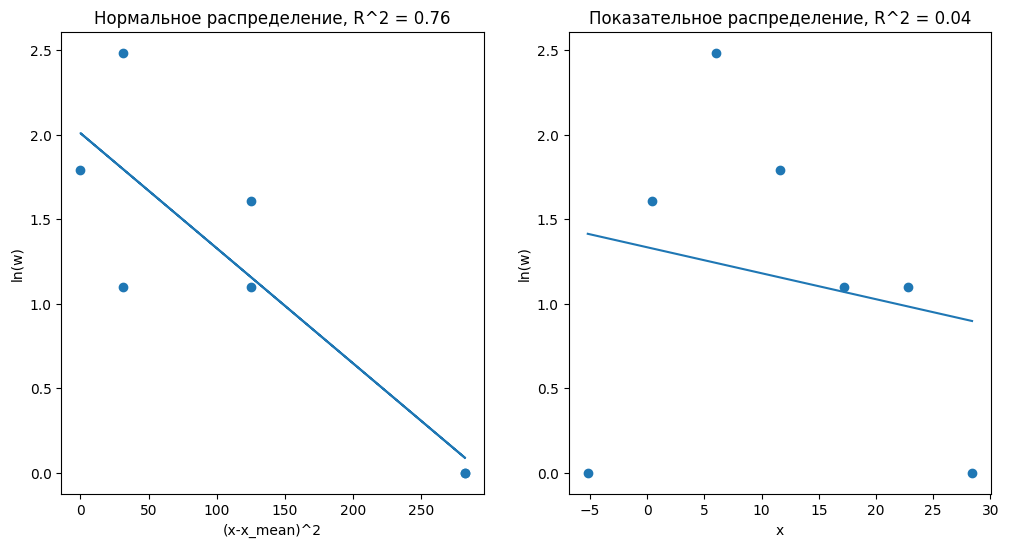

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

reg = LinearRegression().fit(np.array(int_data1['x_for_norm']).reshape(-1, 1), np.array(int_data1['lnw']))
axes[0].plot(int_data1['x_for_norm'], reg.predict(np.array(int_data1['x_for_norm']).reshape(-1, 1)))
axes[0].scatter(int_data1['x_for_norm'], int_data1['lnw'])
axes[0].set_xlabel('(x-x_mean)^2')
axes[0].set_ylabel('ln(w)')
r = reg.score(np.array(int_data1['x_for_norm']).reshape(-1, 1), np.array(int_data1['lnw']))
axes[0].set_title(f'Нормальное распределение, R^2 = {r:.2f}')

reg = LinearRegression().fit(np.array(int_data1['x']).reshape(-1, 1), np.array(int_data1['lnw']))
axes[1].plot(int_data1['x'], reg.predict(np.array(int_data1['x']).reshape(-1, 1)))
axes[1].scatter(int_data1['x'], int_data1['lnw'])
axes[1].set_xlabel('x')
axes[1].set_ylabel('ln(w)')
r = reg.score(np.array(int_data1['x']).reshape(-1, 1), np.array(int_data1['lnw']))
axes[1].set_title(f'Показательное распределение, R^2 = {r:.2f}')
None

## 3.2 Файл 3

In [104]:
int_data3['x'] = (int_data3['Start'] + int_data3['End']) / 2
int_data3['x_for_norm'] = (int_data3['x'] - int_data3['x'].mean())**2
int_data3['lnw'] = np.log(int_data3['Abs_Freq'])
int_data3

,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square,x,x_for_norm,lnw
0,0.0,1.1,15,0.46875,0.495696,15.862261,0.046872,0.55,1.089000e+01,2.708050
1,1.1,2.2,11,0.34375,0.250081,8.002579,1.122704,1.65,4.840000e+00,2.397895
2,2.2,3.3,1,0.03125,0.126191,4.038122,2.285761,2.75,1.210000e+00,0.000000
3,3.3,4.4,1,0.03125,0.063701,2.038432,0.529005,3.85,1.972152e-31,0.000000
4,4.4,5.5,1,0.03125,0.032181,1.029780,0.000861,4.95,1.210000e+00,0.000000
5,5.5,6.6,2,0.06250,0.016282,0.521011,4.198388,6.05,4.840000e+00,0.693147
6,6.6,7.7,1,0.03125,0.008262,0.264386,2.046731,7.15,1.089000e+01,0.000000


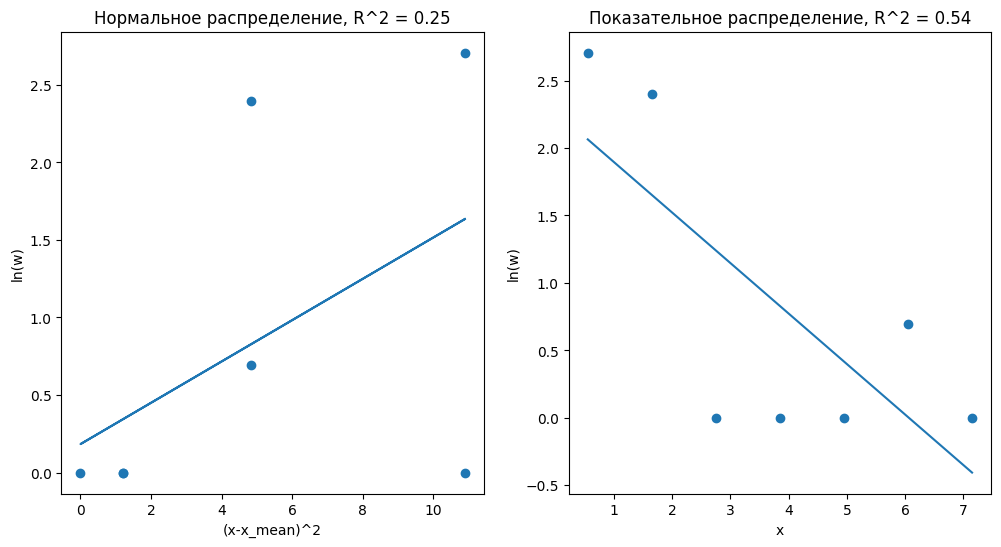

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

reg = LinearRegression().fit(np.array(int_data3['x_for_norm']).reshape(-1, 1), np.array(int_data3['lnw']))
axes[0].plot(int_data3['x_for_norm'], reg.predict(np.array(int_data3['x_for_norm']).reshape(-1, 1)))
axes[0].scatter(int_data3['x_for_norm'], int_data3['lnw'])
axes[0].set_xlabel('(x-x_mean)^2')
axes[0].set_ylabel('ln(w)')
r = reg.score(np.array(int_data3['x_for_norm']).reshape(-1, 1), np.array(int_data3['lnw']))
axes[0].set_title(f'Нормальное распределение, R^2 = {r:.2f}')

reg = LinearRegression().fit(np.array(int_data3['x']).reshape(-1, 1), np.array(int_data3['lnw']))
axes[1].plot(int_data3['x'], reg.predict(np.array(int_data3['x']).reshape(-1, 1)))
axes[1].scatter(int_data3['x'], int_data3['lnw'])
axes[1].set_xlabel('x')
axes[1].set_ylabel('ln(w)')
r = reg.score(np.array(int_data3['x']).reshape(-1, 1), np.array(int_data3['lnw']))
axes[1].set_title(f'Показательное распределение, R^2 = {r:.2f}')
None

## 3.3 Файл 4

In [106]:
int_data4['x'] = (int_data4['Start'] + int_data4['End']) / 2
int_data4['x_for_norm'] = (int_data4['x'] - int_data4['x'].mean())**2
int_data4['lnw'] = np.log(int_data4['Abs_Freq'])
int_data4.replace([-np.inf], 0, inplace=True)
int_data4

D:\Python\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square,x,x_for_norm,lnw
0,-10.2,-7.1,13,0.101562,0.000100,0.012800,13177.137800,-8.65,153.76,2.564949
1,-7.1,-4.0,38,0.296875,0.000100,0.012800,112736.512800,-5.55,86.49,3.637586
2,-4.0,-0.9,35,0.273438,0.000100,0.012800,95633.137800,-2.45,38.44,3.555348
3,-0.9,2.2,34,0.265625,-1.209922,-154.870001,-230.334326,0.65,9.61,3.526361
4,2.2,5.3,4,0.031250,-4.545769,-581.858492,-589.885990,3.75,0.00,1.386294
5,5.3,8.4,2,0.015625,-13.896324,-1778.729416,-1782.731665,6.85,9.61,0.693147
6,8.4,11.5,0,0.000000,-42.480352,-5437.485005,-5437.485005,9.95,38.44,0.000000
7,11.5,14.6,0,0.000000,-129.859843,-16622.059875,-16622.059875,13.05,86.49,0.000000
8,14.6,17.7,1,0.007812,-396.973192,-50812.568631,-50814.568651,16.15,153.76,0.000000


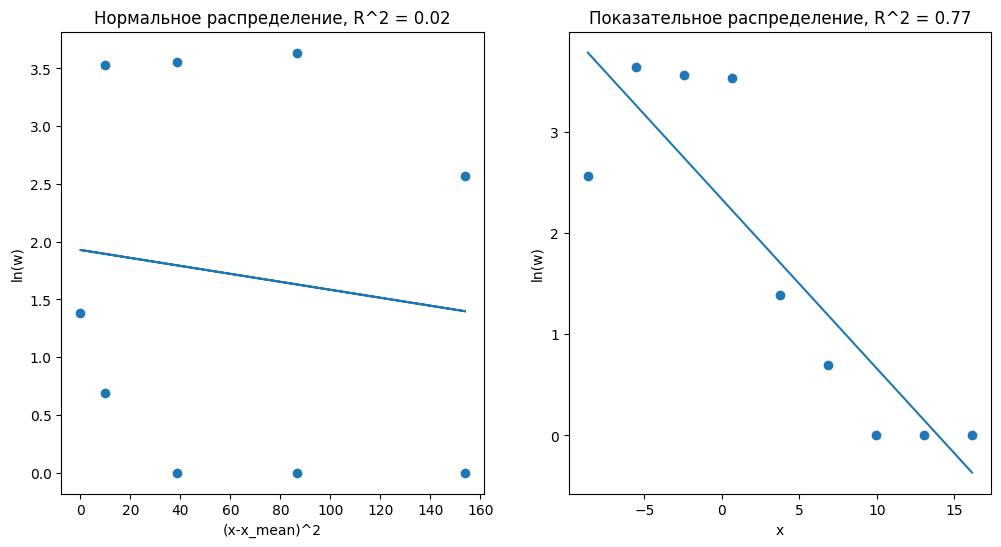

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

reg = LinearRegression().fit(np.array(int_data4['x_for_norm']).reshape(-1, 1), np.array(int_data4['lnw']))
axes[0].plot(int_data4['x_for_norm'], reg.predict(np.array(int_data4['x_for_norm']).reshape(-1, 1)))
axes[0].scatter(int_data4['x_for_norm'], int_data4['lnw'])
axes[0].set_xlabel('(x-x_mean)^2')
axes[0].set_ylabel('ln(w)')
r = reg.score(np.array(int_data4['x_for_norm']).reshape(-1, 1), np.array(int_data4['lnw']))
axes[0].set_title(f'Нормальное распределение, R^2 = {r:.2f}')

reg = LinearRegression().fit(np.array(int_data4['x']).reshape(-1, 1), np.array(int_data4['lnw']))
axes[1].plot(int_data4['x'], reg.predict(np.array(int_data4['x']).reshape(-1, 1)))
axes[1].scatter(int_data4['x'], int_data4['lnw'])
axes[1].set_xlabel('x')
axes[1].set_ylabel('ln(w)')
r = reg.score(np.array(int_data4['x']).reshape(-1, 1), np.array(int_data4['lnw']))
axes[1].set_title(f'Показательное распределение, R^2 = {r:.2f}')
None

## 3.3 Файл 6

In [109]:
int_data6['x'] = (int_data6['Start'] + int_data6['End']) / 2
int_data6['x_for_norm'] = (int_data6['x'] - int_data6['x'].mean())**2
int_data6['lnw'] = np.log(int_data6['Abs_Freq'])
int_data6.replace([-np.inf], 0, inplace=True)
int_data6

D:\Python\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Start,End,Abs_Freq,Relative_Freq,Pi,nP,chi_square,x,x_for_norm,lnw
0,-0.0,1.4,52,0.406250,0.438102,56.076997,0.296412,0.7,31.36,3.951244
1,1.4,2.8,37,0.289062,0.246256,31.520792,0.952442,2.1,17.64,3.610918
2,2.8,4.2,18,0.140625,0.138439,17.720243,0.004417,3.5,7.84,2.890372
3,4.2,5.6,8,0.062500,0.077847,9.964356,0.387250,4.9,1.96,2.079442
4,5.6,7.0,4,0.031250,0.043793,5.605559,0.459869,6.3,0.00,1.386294
5,7.0,8.4,3,0.023438,0.024656,3.155922,0.007704,7.7,1.96,1.098612
6,8.4,9.8,5,0.039062,0.013900,1.779230,5.830254,9.1,7.84,1.609438
7,9.8,11.2,1,0.007812,0.007856,1.005531,0.000030,10.5,17.64,0.000000
8,11.2,12.6,0,0.000000,0.004459,0.570713,0.570713,11.9,31.36,0.000000


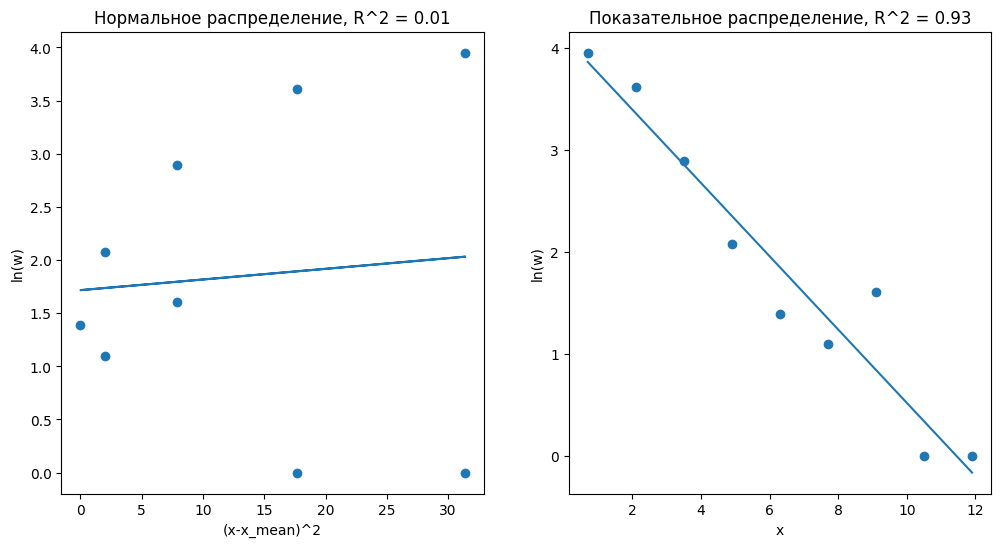

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

reg = LinearRegression().fit(np.array(int_data6['x_for_norm']).reshape(-1, 1), np.array(int_data6['lnw']))
axes[0].plot(int_data6['x_for_norm'], reg.predict(np.array(int_data6['x_for_norm']).reshape(-1, 1)))
axes[0].scatter(int_data6['x_for_norm'], int_data6['lnw'])
axes[0].set_xlabel('(x-x_mean)^2')
axes[0].set_ylabel('ln(w)')
r = reg.score(np.array(int_data6['x_for_norm']).reshape(-1, 1), np.array(int_data6['lnw']))
axes[0].set_title(f'Нормальное распределение, R^2 = {r:.2f}')

reg = LinearRegression().fit(np.array(int_data6['x']).reshape(-1, 1), np.array(int_data6['lnw']))
axes[1].plot(int_data6['x'], reg.predict(np.array(int_data6['x']).reshape(-1, 1)))
axes[1].scatter(int_data6['x'], int_data6['lnw'])
axes[1].set_xlabel('x')
axes[1].set_ylabel('ln(w)')
r = reg.score(np.array(int_data6['x']).reshape(-1, 1), np.array(int_data6['lnw']))
axes[1].set_title(f'Показательное распределение, R^2 = {r:.2f}')
None